In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import colormaps as cmaps

In [62]:
w_decay_k250_df = pd.read_csv("w_decay_lower_losses_by_epoch.csv")

w_decay_k250_df.drop(index=w_decay_k250_df[w_decay_k250_df['weight_decay'] == 2].index, inplace=True)

w_decay_k250_df

,epoch,loss,reconstruction_loss,divergence_loss,stoicheometry_loss,test_loss,test_reconstruction_loss,test_divergence_loss,test_stoicheometry_loss,epochs,...,refresh_data_on,save_losses_on,test_dataset,test_size,save_test_min,weight_decay,beta_S,main_folder,losses_file,run
0,0,2317.875186,2286.350397,31.524798,0.0,2419.177452,2389.643503,29.533946,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.00010,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
1,1,1528.296683,1493.860343,34.436337,0.0,1760.972544,1728.807342,32.165199,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.00010,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
2,2,1268.407045,1235.891499,32.515549,0.0,1559.117169,1528.419061,30.698108,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.00010,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
3,3,1129.754085,1096.041609,33.712476,0.0,1479.651302,1448.237160,31.414144,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.00010,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
4,4,998.922489,963.089631,35.832854,0.0,1449.475876,1416.659395,32.816481,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.00010,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,27,485.197920,421.029660,64.168260,0.0,1767.639007,1723.887623,43.751381,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.48596,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,6
220,28,475.347860,410.985592,64.362267,0.0,1767.033415,1723.230287,43.803127,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.48596,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,6
221,29,465.748039,401.136996,64.611042,0.0,1766.896487,1723.005814,43.890672,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.48596,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,6
222,30,464.520963,400.067804,64.453158,0.0,1768.293022,1724.562970,43.730050,0.0,32,...,0,1,./data/samples/single_cells/agren_liver_hepato...,4096,True,0.48596,0.0,./data/tuner/single_cell/agren_liver_hepatocyt...,./data/tuner/single_cell/agren_liver_hepatocyt...,6


In [68]:



min_df = w_decay_k250_df.groupby("weight_decay")['loss', 'test_loss'].min()
min_df

fin_df = w_decay_k250_df[w_decay_k250_df['epoch'] == 31].groupby('weight_decay')['loss', 'test_loss'].mean()
fin_df

/tmp/ipykernel_16480/3791291436.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  min_df = w_decay_k250_df.groupby("weight_decay")['loss', 'test_loss'].min()
/tmp/ipykernel_16480/3791291436.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  fin_df = w_decay_k250_df[w_decay_k250_df['epoch'] == 31].groupby('weight_decay')['loss', 'test_loss'].mean()


,loss,test_loss
weight_decay,,
0.000100,235.334976,1571.378684
0.000412,236.189523,1592.905288
0.001694,230.380006,1577.641342
0.006971,236.352307,1540.931196
0.028690,244.176888,1558.235063
0.118080,277.475660,1566.547978
0.485960,455.755900,1768.437205


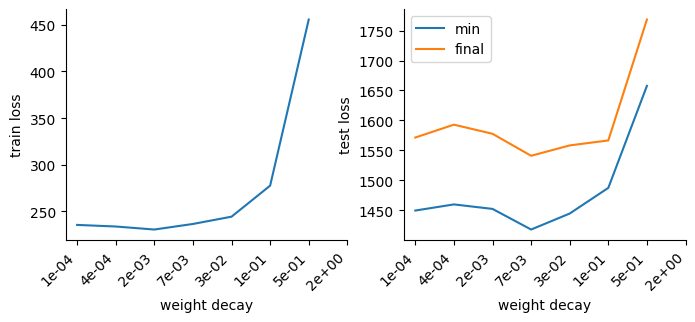

In [81]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))

x = np.arange(w_decay_k250_df['weight_decay'].nunique())

ax1.plot(x, min_df['loss'])
ax2.plot(x, min_df['test_loss'], label='min')
ax2.plot(x, fin_df['test_loss'], label='final')

ax2.legend()

ax1.spines[['right', 'top']].set_visible(False)
ax2.spines[['right', 'top']].set_visible(False)

ax1.set_xlabel("weight decay")
ax2.set_xlabel("weight decay")

ax2.set_ylabel("test loss")
ax1.set_ylabel("train loss")

ax1.set_xticks(range(len(min_df.index)), [f"{wd:1.0e}" for wd in min_df.index], rotation=45, ha='right')
ax2.set_xticks(range(len(min_df.index)), [f"{wd:1.0e}" for wd in min_df.index], rotation=45, ha='right')

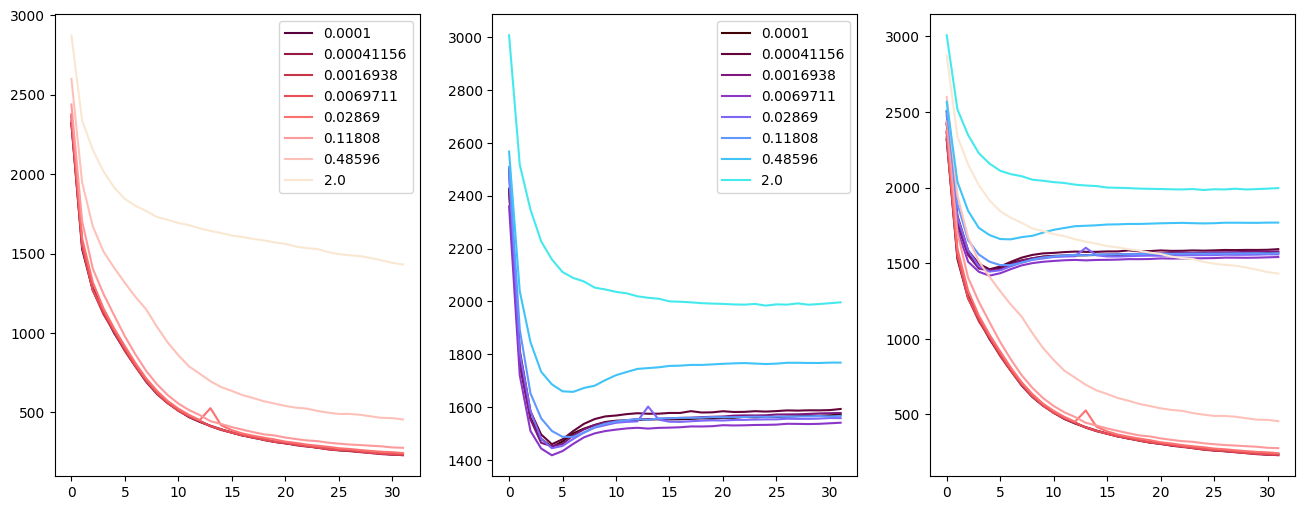

In [10]:
w_decays = w_decay_k250_df["weight_decay"].unique()
n_w_decays = len(w_decays)

train_colors = cmaps.fushia_red_pink1.discrete(n_w_decays).colors
test_colors = cmaps.gem.discrete(n_w_decays).colors

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6))

for i, w_decay in enumerate(w_decays):
    df = w_decay_k250_df[w_decay_k250_df["weight_decay"] == w_decay]

    ax1.plot(df["epoch"], df["loss"], label=w_decay, color=train_colors[i])
    ax2.plot(df["epoch"], df["test_loss"], label=w_decay, color=test_colors[i])

    ax3.plot(df["epoch"], df["loss"], label=w_decay, color=train_colors[i])
    ax3.plot(df["epoch"], df["test_loss"], label=w_decay, color=test_colors[i])

ax1.legend()
ax2.legend()

fig.savefig("w_decay_test_train.png", dpi=400)